### 使用torch自带的ImageFolder

In [40]:
import torch
from torchvision import datasets

train_path = "./data/ch3.3/train_data"
val_path = "./data/ch3.3/val_data"

def data_transform(data): 
  data = data.resize((224, 224))
  return data

train_data = datasets.ImageFolder(train_path, transform=data_transform)
val_data = datasets.ImageFolder(val_path, transform=data_transform)

In [41]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=1, num_workers=4, shuffle=True, drop_last=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=1, num_workers=4, shuffle=False)

In [42]:
print(train_data.class_to_idx)
print(train_data.imgs)
print(train_data[0][0].size)

{'cat': 0, 'dog': 1}
[('./data/ch3.3/train_data\\cat\\1.jpg', 0), ('./data/ch3.3/train_data\\cat\\2.jpg', 0), ('./data/ch3.3/train_data\\cat\\3.jpg', 0), ('./data/ch3.3/train_data\\cat\\4.jpg', 0), ('./data/ch3.3/train_data\\dog\\1.jpg', 1), ('./data/ch3.3/train_data\\dog\\2.jpg', 1), ('./data/ch3.3/train_data\\dog\\3.jpg', 1), ('./data/ch3.3/train_data\\dog\\4.jpg', 1)]
(224, 224)


### 自定义DataSet

In [43]:
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset
import torchvision.transforms as transforms

class MyDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    """
    Args:
    """
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform
  
  def __len__(self):
    return len(self.img_labels)
  
  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label
  
# 先实例化一个 transform 对象，将图片 resize 到 128x128
my_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    # transforms.ToTensor(),  # 可以添加其他的 transform 操作，比如归一化
])

train_data = MyDataset("./data/ch3.3/annotations.csv", "./data/ch3.3/", my_transforms)


torch.Size([3, 128, 128])


c:\Users\ys\.conda\envs\nngen\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


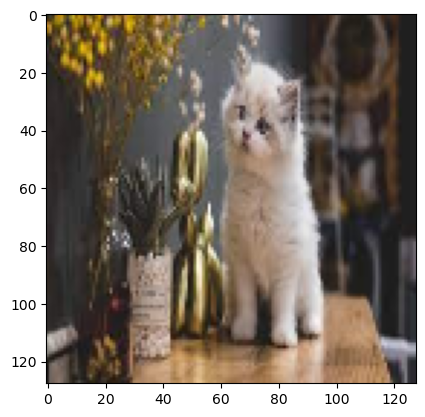

In [44]:
import matplotlib.pyplot as plt
images, labels = next(iter(train_data))
print(images.shape)
plt.imshow(images.permute(1,2,0))
plt.show()